# Suicide Detection Model

In [4]:
import pandas as pd
import pyprind
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.io as pio
import plotly.io as pio
pio.renderers.default = 'vscode'



## Reading In Data and Basic EDA

In [7]:
file_path = r"C:\Users\ryan_\OneDrive\Desktop\Suicide_Detection.csv"

# Define column names based on the first line of the file
df = pd.read_csv(file_path, index_col = 0)

# Read the f

In [8]:
print("Dimensions: ", df.shape, "with", df.shape[0], "rows", "and", df.shape[1],"columns")

Name_Columns = df.columns
print(Name_Columns)

Dimensions:  (232074, 2) with 232074 rows and 2 columns
Index(['text', 'class'], dtype='object')


In [9]:
df.describe()

,text,class
count,232074,232074
unique,232074,2
top,Ex Wife Threatening SuicideRecently I left my ...,suicide
freq,1,116037


## Generic Preprocessing

In [10]:
print("Missing Values:")
print(df.isnull().sum())

Missing Values:
text     0
class    0
dtype: int64


In [11]:
duplicate_rows = df.duplicated()
num_duplicates = duplicate_rows.sum()
duplicate_data = df[duplicate_rows]

print(f"Number of duplicate rows: {num_duplicates}")
print("Duplicate rows:", duplicate_data)

Number of duplicate rows: 0
Duplicate rows: Empty DataFrame
Columns: [text, class]
Index: []


In [12]:
df['class'].value_counts()

class
suicide        116037
non-suicide    116037
Name: count, dtype: int64

## Further EDA

<Axes: xlabel='class', ylabel='Count'>

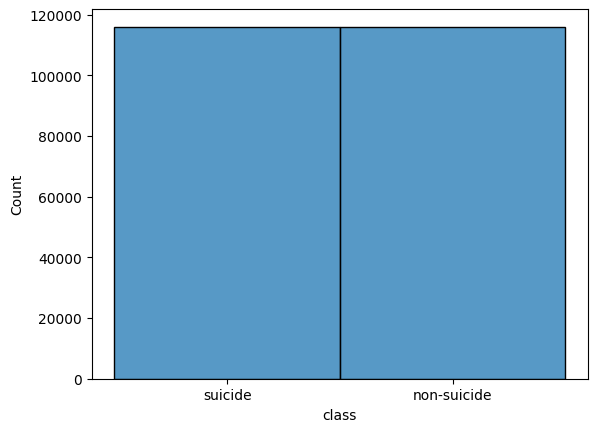

In [13]:
sns.histplot(df['class'])

In [25]:
suicide = df[df['class']=='suicide']['text']
nonsuicide = df[df['class']=='non-suicide']['text']

In [15]:
suicide.head()

2     Ex Wife Threatening SuicideRecently I left my ...
8             i need helpjust help me im crying so hard
9     I’m so lostHello, my name is Adam (16) and I’v...
11    Honetly idkI dont know what im even doing here...
12    [Trigger warning] Excuse for self inflicted bu...
Name: text, dtype: object

In [16]:
nonsuicide.head()

3     Am I weird I don't get affected by compliments...
4     Finally 2020 is almost over... So I can never ...
16    Everyone wants to be "edgy" and it's making me...
24    Fuck the verizon smart family app I can’t even...
26    Well, Im screwed. I locked myself in the schoo...
Name: text, dtype: object

### WordCloud

In [20]:
from wordcloud import WordCloud

def WORDCLOUD(data, colormap, background_color):
    wc = WordCloud(
        background_color=background_color,
        max_words = 1500,
        colormap=colormap,
        random_state=41
        
    ).generate(' '.join(data))
    plt.subplots(figsize=(10,10))
    plt.imshow(wc)
    plt.axis('off')
    plt.show()
    


    
    
    
    
    

In [18]:
WORDCLOUD(suicide, colormap='Grays',background_color='white')

KeyboardInterrupt: 

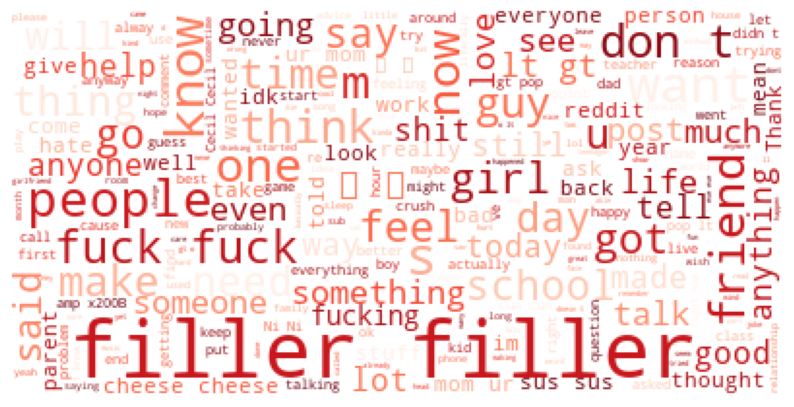

In [18]:
WORDCLOUD(nonsuicide, colormap='Reds', backgorund_color = 'white')

### Post Length 

C:\Users\ryan_\AppData\Local\Temp\ipykernel_47552\771468372.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(suicide_length,
C:\Users\ryan_\AppData\Local\Temp\ipykernel_47552\771468372.py:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(nonsuicide_length, color = '#03fcb1', ax = ax1)


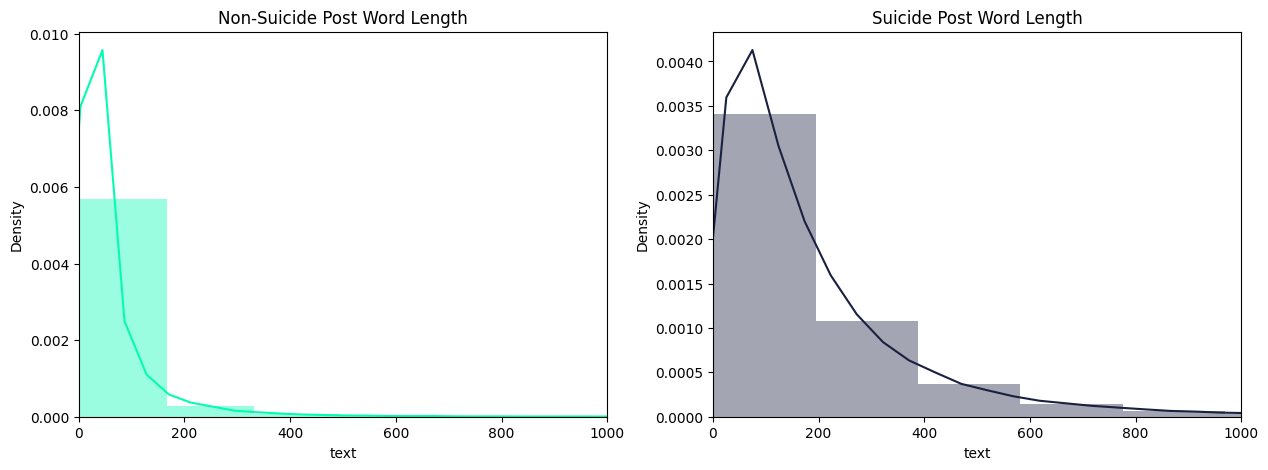

In [19]:
def str_length(text):
    return len(text)



def lenght_plot(suicide_length,nonsuicide_length, xlim_range = None):
                title1 = "Suicide Post Word Length"
                title2 = "Non-Suicide Post Word Length"
                fig,(ax1,ax2) = plt.subplots(1, 2, figsize=(15, 5))
                sns.distplot(suicide_length, 
                color = '#192040', ax=ax2)
                ax2.set_title(title1)
                sns.distplot(nonsuicide_length, color = '#03fcb1', ax = ax1)
                ax1.set_title(title2)
                
                if xlim_range:
                    ax1.set_xlim(xlim_range)
                    ax2.set_xlim(xlim_range)
                plt.show()
                
xlim_range = (0, 1000)

suicide_length = suicide.str.split().apply(lambda x: str_length(x))   
nonsuicide_length = nonsuicide.str.split().apply(lambda x: str_length(x))

lenght_plot(suicide_length, nonsuicide_length, xlim_range)

                
                
    

# Text Cleaning and Tokenizing 

In [10]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

df['class'] = label_encoder.fit_transform(df['class'])
df['text'] = df['text'].str.lower()
test_df = df.head(5)

test_df.head()



NameError: name 'df' is not defined

In [11]:
import re 
import string
import wordninja
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import words
from nltk.corpus import stopwords
import spacy

#split words

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('words')

abb = {
  "ain't": "am not",
  "aren't": "are not",
  "can't": "cannot",
  "can't've": "cannot have",
  "'cause": "because",
  "could've": "could have",
  "couldn't": "could not",
  "couldn't've": "could not have",
  "didn't": "did not",
  "doesn't": "does not",
  "don't": "do not",
  "dont": "do not",
  "hadn't": "had not",
  "hadn't've": "had not have",
  "hasn't": "has not",
  "haven't": "have not",
  "he'd": "he would",
  "idk": "i do not know",
  "he'd've": "he would have",
  "he'll": "he will",  "he'll've": "he will have",
  "he's": "he is",
  "how'd": "how did",
  "how'd'y": "how do you",
  "how'll": "how will",
  "how's": "how is",
  "i'd": "i would",
  "i'd've": "i would have",
  "i'll": "i will",
  "i'll've": "i will have",
  "i'm": "i am",
  "im": "i am",
  "i've": "i have",
  "isn't": "is not",
  "it'd": "it had",
  "it'd've": "it would have",
  "it'll": "it will",
  "it'll've": "it will have",
  "it's": "it is", "let's": "let us",
  "ma'am": "madam",
  "mayn't": "may not",
  "might've": "might have",
  "mightn't": "might not",
  "mightn't've": "might not have",
  "must've": "must have",
  "mustn't": "must not",
  "mustn't've": "must not have",
  "needn't": "need not",
  "needn't've": "need not have",
  "o'clock": "of the clock",
  "oughtn't": "ought not",
  "oughtn't've": "ought not have",
  "shan't": "shall not",
  "sha'n't": "shall not",
  "shan't've": "shall not have",
  "she'd": "she would",
  "she'd've": "she would have", "she'll": "she will",
  "she'll've": "she will have",
  "she's": "she is",
  "should've": "should have",
  "shouldn't": "should not",
  "shouldn't've": "should not have",
  "so've": "so have",
  "so's": "so is",
  "that'd": "that would",
  "that'd've": "that would have",
  "that's": "that is",
  "there'd": "there had",
  "there'd've": "there would have",
  "there's": "there is",
  "they'd": "they would",
  "they'd've": "they would have",
  "they'll": "they will",
  "they'll've": "they will have",
  "they're": "they are",
  "they've": "they have",      "to've": "to have",
  "wasn't": "was not",
  "we'd": "we had",
  "we'd've": "we would have",
  "we'll": "we will",
  "we'll've": "we will have",
  "we're": "we are",
  "we've": "we have",
  "weren't": "were not",
  "what'll": "what will",
  "what'll've": "what will have",
  "what're": "what are",
  "what's": "what is",
  "what've": "what have",
  "when's": "when is",
  "when've": "when have",
  "where'd": "where did",
  "where's": "where is",
  "where've": "where have", "who'll": "who will",
  "who'll've": "who will have",
  "who's": "who is",
  "who've": "who have",
  "why's": "why is",
  "why've": "why have",
  "will've": "will have",
  "won't": "will not",
  "won't've": "will not have",
  "would've": "would have",
  "wouldn't": "would not",
  "wouldn't've": "would not have",
  "y'all": "you all",
  "y'alls": "you alls",
  "y'all'd": "you all would",
  "y'all'd've": "you all would have",
  "y'all're": "you all are",
  "y'all've": "you all have",
  "you'd": "you had",
  "you'd've": "you would have", "you'll": "you you will",
  "you'll've": "you you will have",
  "you're": "you are",
  "you've": "you have"
}
abb_re = re.compile('(%s)' % '|'.join(abb.keys()))

def tokenize_text(text):
    return word_tokenize(text)

def remove_punctuation(tokens):
    return [token for token in tokens if token.isalnum()]
   
def stop_words(tokens):
    stop_words = set(stopwords.words('english'))
    return [token for token in tokens if token.lower() not in stop_words]


def remove_whitespace(tokens):
    return [token.strip() for token in tokens]

    
def expandContractions(tokens,abb_re=abb_re):
    def replace (match):
        return abb[match.group(0)]
    return abb_re.sub(replace, tokens)

def no_numbers(tokens):
    return [token for token in tokens if not token.isdigit()]

def no_symbols(tokens):
    return [re.sub('[^a-zA-Z\s]', ' ', token) for token in tokens]
def no_special(tokens):
    return [token.replace("\r"," "). replace("\n", " ") for token in tokens]
def no_urls(tokens):
    return [re.sub(r'https\S+','', token) for token in tokens]
def no_email(tokens):
    return [re.sub(r'\S+@\S+', '', token) for token in tokens]
def no_emoji(tokens):
    return [re.sub(r'[\U0001F600-\U0001F64F\U0001F300-\U0001F5FF\U0001F680-\U0001F6FF\U0001F700-\U0001F77F\U0001F780-\U0001F7FF\U0001F800-\U0001F8FF\U0001F900-\U0001F9FF\U0001FA00-\U0001FA6F\U0001FA70-\U0001FAFF\U0001FB00-\U0001FBFF\U0001FE00-\U0001FE0F\U0001F004]+', '', token) for token in tokens]





        


: 

In [55]:
nlp = spacy.load('en_core_web_sm')

def lemmatize(tokens):
    text = ' '.join(tokens)
    doc = nlp(text)
    return [token.lemma_ for token in doc]



In [56]:
english = set(words.words())
exclude = {'Fuck', 'Shit', 'Asshole', 'Bitch', 'Bastard', 'Dick', 'Cunt', 'Twat', 'Ass', 'Cock', 'Pussy', 'Motherfucker', 'Douchebag', 'Wanker', 'Arsehole', 'Bollocks', 'Bugger', 'Piss', 'Crap', 'Damn', 'Slut', 'Whore'
}

def only_english(tokens):
    english_tokens = [token if (token in english or token in exclude) 
                      else '' for token in tokens]
    return [token for token in english_tokens if token !='']

In [58]:
df['text'] = df['text'].str.replace("'", "'") \
                                  .apply(expandContractions) \
                                  .apply(tokenize_text) \
                                  .apply(remove_punctuation) \
                                  .apply(stop_words) \
                                  .apply(lambda tokens: wordninja.split(" ".join(tokens))) \
                                  .apply(remove_whitespace) \
                                  .apply(no_numbers) \
                                  .apply(no_symbols) \
                                  .apply(no_special) \
                                  .apply(no_urls) \
                                  .apply(no_email) \
                                  .apply(no_emoji) \
                                  .apply(lambda x: [word for word in x if len(word) > 2]) \
                                  .apply(lemmatize) \
                                  .apply(only_english)
def save_dataframe(df, filename):
    df.to_csv(filename, index=False) 
    print(f"DataFrame successfully saved to {file_path}")
    

save_dataframe(df, r'C:\Users\ryan_\OneDrive\Desktop\Suicide Watch Detection\src\Data\cleaned_data.csv')

,text,class
2,"[wife, threaten, suicide, recently, leave, wif...",1
3,"[weird, get, affect, come, someone, know, feel...",0
4,"[finally, almost, never, hear, bad, year, ever...",0
8,"[need, help, just, help, cry, hard]",1
9,"[lose, hello, name, struggle, year, afraid, pa...",1


In [61]:
df['text'].head()

2    [wife, threaten, suicide, recently, leave, wif...
3    [weird, get, affect, come, someone, know, feel...
4    [finally, almost, never, hear, bad, year, ever...
8                  [need, help, just, help, cry, hard]
9    [lose, hello, name, struggle, year, afraid, pa...
Name: text, dtype: object

In [ ]:
df.head()

,text,class
2,ex wife threaten suiciderec left wife good che...,1
3,weird nt get affect compliment come someon kno...,0
4,final 2020 almost never hear 2020 bad year ...,0
8,need helpjust help im cri hard,1
9,’ losthello name adam 16 ’ struggl year ’ a...,1


In [56]:
file_path_clean = r"C:\Users\ryan_\OneDrive\Desktop\Suicide Watch Detection\src\Data\cleaned_data.csv"
cdf = pd.read_csv(file_path_clean)
print(cdf.index)

RangeIndex(start=0, stop=232074, step=1)


In [47]:

cdf['text'] = cdf['text'].apply(lambda x: x.replace("'", "").replace("[", "").replace("]", ""))
cdf.head()

,text,class
0,"wife, threaten, suicide, recently, leave, wife...",1
1,"weird, get, affect, come, someone, know, feel,...",0
2,"finally, almost, never, hear, bad, year, ever,...",0
3,"need, help, just, help, cry, hard",1
4,"lose, hello, name, struggle, year, afraid, pas...",1


In [15]:
suicide = cdf[cdf['class']== 1]['text']
nonsuicide = cdf[cdf['class']== 0]['text']






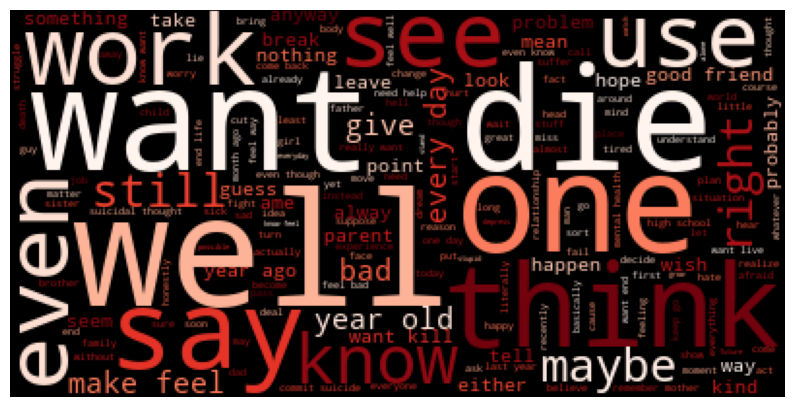

In [21]:
WORDCLOUD(suicide, colormap='Reds', background_color='black')

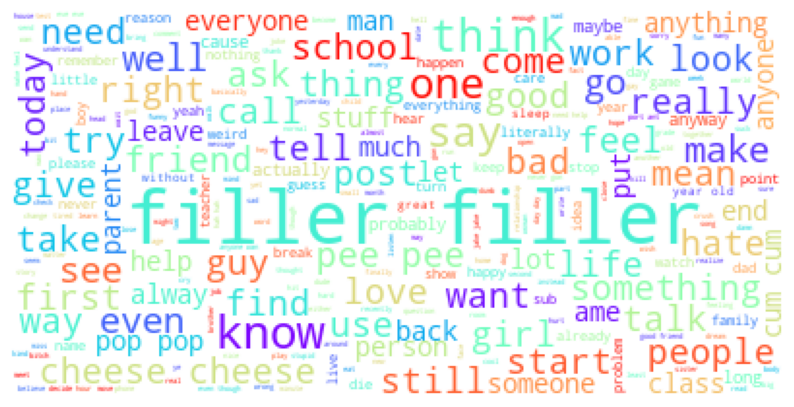

In [23]:
WORDCLOUD(nonsuicide, colormap = 'rainbow', background_color='white')

## ML/DL MODELS

### SGDClassifier (Stochastic Gradient Descent)

In [3]:
def stream_docs(path):
    with open(path, 'r', encoding='utf-8') as csv:
        next(csv)
        for line in csv:
            text, label = line[:-3], int(line[-2])
            yield text, label
            
next(stream_docs(path = r"C:\Users\ryan_\OneDrive\Desktop\Suicide Watch Detection\src\Data\cleaned_data.csv"))

('"[\'wife\', \'threaten\', \'suicide\', \'recently\', \'leave\', \'wife\', \'good\', \'cheat\', \'twice\', \'lie\', \'much\', \'decide\', \'refuse\', \'back\', \'day\', \'ago\', \'begin\', \'threaten\', \'suicide\', \'tirelessly\', \'spend\', \'day\', \'talk\', \'keep\', \'hesitate\', \'want\', \'believe\', \'come\', \'back\', \'know\', \'lot\', \'people\', \'threaten\', \'order\', \'get\', \'way\', \'really\', \'suppose\', \'handle\', \'death\', \'hand\', \'still\', \'love\', \'wife\', \'deal\', \'getting\', \'cheat\', \'constantly\', \'feel\', \'insecure\', \'worried\', \'today\', \'may\', \'day\', \'hope\', \'much\', \'happen\']"',
 1)

In [6]:
def get_minibatch(doc_stream, size):
    docs, y = [], []
    try:
        for _ in range(size):
            text, label = next(doc_stream)
            docs.append(text)
            y.append(label)
    except StopIteration:
        return None, None
    return docs, y


In [7]:

from sklearn.feature_extraction.text import HashingVectorizer
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import roc_auc_score

vect = HashingVectorizer(decode_error='ignore', n_features=2**21)

param_grid ={
    'alpha': [1e-4,1e-3,1e-2],
    'penalty':['l1','l2'],
    'learning_rate': ['constant','optimal','invscaling','adaptive'],
    'eta0' : [0.01,0.1,1.0],
    'max_iter':[1000,2000,3000]
}


doc_stream =stream_docs(path= r"C:\Users\ryan_\OneDrive\Desktop\Suicide Watch Detection\src\Data\cleaned_data.csv")                    


In [5]:
from sklearn.metrics import roc_curve, auc, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

# Initialize lists to store metrics
roc_auc_list = []
accuracy_list = []
precision_list = []
recall_list = []
f1_list = []

model_performance = [] 
classes = np.array([0,1])
scores = np.zeros((len(param_grid['alpha']), len(param_grid['penalty']),
                   len(param_grid['learning_rate']), len(param_grid['eta0']), len(param_grid['max_iter'])))

for i_alpha, alpha in enumerate(param_grid['alpha']):
    for i_penalty, penalty in enumerate(param_grid['penalty']):
        for i_learning_rate, learning_rate in enumerate(param_grid['learning_rate']):
            for i_eta0, eta0 in enumerate(param_grid['eta0']):
                for i_max_iter, max_iter in enumerate(param_grid['max_iter']):
                    pbar = pyprind.ProgBar(45)
                    doc_stream = stream_docs(path= r"C:\Users\ryan_\OneDrive\Desktop\Suicide Watch Detection\src\Data\cleaned_data.csv")
                    clf = SGDClassifier(loss='log_loss', alpha=alpha, penalty=penalty,
                                        learning_rate=learning_rate, eta0=eta0, max_iter=max_iter, random_state=42)
                    scores_list = []
                    for _ in range(45):
                        X_train, y_train = get_minibatch(doc_stream, size = 4641)
                        if not X_train:
                            break
                        X_train = vect.transform(X_train)
                        clf.partial_fit(X_train, y_train, classes=classes)
                        pbar.update()
                        
                    # Predict probabilities for positive class
                    y_score = clf.predict_proba(X_train)[:, 1]
                    
                    # Calculate ROC curve and AUC
                    fpr, tpr, _ = roc_curve(y_train, y_score)
                    roc_auc = auc(fpr, tpr)
                    roc_auc_list.append(roc_auc)
                    
                    # Calculate accuracy
                    y_pred = clf.predict(X_train)
                    accuracy = accuracy_score(y_train, y_pred)
                    accuracy_list.append(accuracy)
                    
                    # Calculate precision
                    precision = precision_score(y_train, y_pred)
                    precision_list.append(precision)
                    
                    # Calculate recall
                    recall = recall_score(y_train, y_pred)
                    recall_list.append(recall)
                    
                    # Calculate F1 score
                    f1 = f1_score(y_train, y_pred)
                    f1_list.append(f1)
                    
                    # Plot ROC curve
                    model_performance.append((roc_auc, {'alpha': alpha, 'penalty': penalty, 'learning_rate': learning_rate,
                                                        'eta0': eta0, 'max_iter': max_iter}))

# Sort model performance based on AUC in descending order and select top 5 models


0% [##############################] 100% | ETA: 00:00:00
Total time elapsed: 00:00:25
0% [##############################] 100% | ETA: 00:00:00
Total time elapsed: 00:00:28
0% [##############################] 100% | ETA: 00:00:00
Total time elapsed: 00:00:23
0% [##############################] 100% | ETA: 00:00:00
Total time elapsed: 00:00:23
0% [##############################] 100% | ETA: 00:00:00
Total time elapsed: 00:00:24
0% [##############################] 100% | ETA: 00:00:00
Total time elapsed: 00:00:23
0% [##############################] 100% | ETA: 00:00:00
Total time elapsed: 00:00:25
0% [##############################] 100% | ETA: 00:00:00
Total time elapsed: 00:00:32
0% [##############################] 100% | ETA: 00:00:00
Total time elapsed: 00:00:28
0% [##############################] 100% | ETA: 00:00:00
Total time elapsed: 00:00:26
0% [##############################] 100% | ETA: 00:00:00
Total time elapsed: 00:00:22
0% [##############################] 100% | ETA: 00:00:

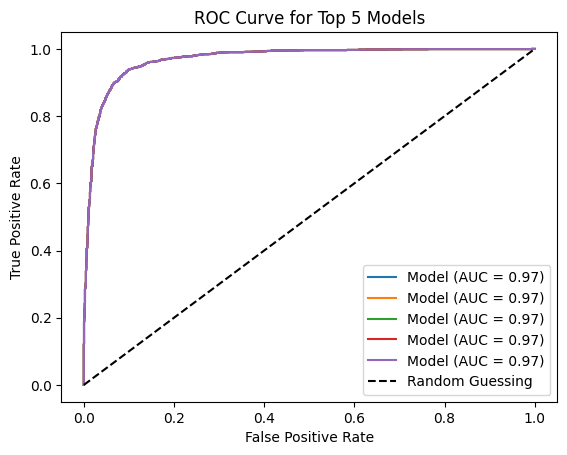

Mean AUC: 0.92
Mean Accuracy: 0.83
Mean Precision: 0.83
Mean Recall: 0.88
Mean F1 Score: 0.84

Top 5 Best Performing Models:
Model 1:
{'alpha': 0.0001, 'penalty': 'l2', 'learning_rate': 'constant', 'eta0': 1.0, 'max_iter': 1000}
AUC Score: 0.98
Accuracy: 0.90
Precision: 0.89
Recall: 0.91
F1 Score: 0.90

Model 2:
{'alpha': 0.0001, 'penalty': 'l2', 'learning_rate': 'constant', 'eta0': 1.0, 'max_iter': 2000}
AUC Score: 0.98
Accuracy: 0.90
Precision: 0.89
Recall: 0.91
F1 Score: 0.90

Model 3:
{'alpha': 0.0001, 'penalty': 'l2', 'learning_rate': 'constant', 'eta0': 1.0, 'max_iter': 3000}
AUC Score: 0.98
Accuracy: 0.90
Precision: 0.89
Recall: 0.91
F1 Score: 0.90

Model 4:
{'alpha': 0.0001, 'penalty': 'l2', 'learning_rate': 'adaptive', 'eta0': 1.0, 'max_iter': 1000}
AUC Score: 0.98
Accuracy: 0.91
Precision: 0.92
Recall: 0.90
F1 Score: 0.91

Model 5:
{'alpha': 0.0001, 'penalty': 'l2', 'learning_rate': 'adaptive', 'eta0': 1.0, 'max_iter': 2000}
AUC Score: 0.98
Accuracy: 0.91
Precision: 0.92
Reca

In [11]:
top_5_models = sorted(model_performance, key=lambda x: x[0], reverse=True)[:5]

# Plot ROC curves for the top 5 models
plt.figure()
for auc_score, params in top_5_models:
    clf = SGDClassifier(loss='log_loss', alpha=params['alpha'], penalty=params['penalty'],
                        learning_rate=params['learning_rate'], eta0=params['eta0'],
                        max_iter=params['max_iter'], random_state=42)
    doc_stream = stream_docs(path=r"C:\Users\ryan_\OneDrive\Desktop\Suicide Watch Detection\src\Data\cleaned_data.csv")
    X_train, y_train = get_minibatch(doc_stream, size=4641)
    X_train = vect.transform(X_train)
    clf.partial_fit(X_train, y_train, classes=classes)
    y_score = clf.predict_proba(X_train)[:, 1]
    fpr, tpr, _ = roc_curve(y_train, y_score)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'Model (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--', label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Top 5 Models')
plt.legend()
plt.show()

# Print scoring metrics
print(f"Mean AUC: {np.mean(roc_auc_list):.2f}")
print(f"Mean Accuracy: {np.mean(accuracy_list):.2f}")
print(f"Mean Precision: {np.mean(precision_list):.2f}")
print(f"Mean Recall: {np.mean(recall_list):.2f}")
print(f"Mean F1 Score: {np.mean(f1_list):.2f}")

# Print parameters for the top 5 best performing models
print("\nTop 5 Best Performing Models:")
for i, (auc_score, params) in enumerate(top_5_models):
    print(f"Model {i+1}:")
    print(params)
    print(f"AUC Score: {auc_score:.2f}")
    # Assuming roc_auc_list, accuracy_list, precision_list, recall_list, f1_list are defined elsewhere
    print(f"Accuracy: {accuracy_list[i]:.2f}")
    print(f"Precision: {precision_list[i]:.2f}")
    print(f"Recall: {recall_list[i]:.2f}")
    print(f"F1 Score: {f1_list[i]:.2f}")
    print()


Worst Performing Models:
Model 1:
Parameters: {'alpha': 0.01, 'penalty': 'l1', 'learning_rate': 'invscaling', 'eta0': 0.1, 'max_iter': 1000}
AUC Score: 0.81
Accuracy: 0.90
Precision: 0.89
Recall: 0.91
F1 Score: 0.90

Model 2:
Parameters: {'alpha': 0.01, 'penalty': 'l1', 'learning_rate': 'invscaling', 'eta0': 0.1, 'max_iter': 2000}
AUC Score: 0.81
Accuracy: 0.90
Precision: 0.89
Recall: 0.91
F1 Score: 0.90

Model 3:
Parameters: {'alpha': 0.01, 'penalty': 'l1', 'learning_rate': 'invscaling', 'eta0': 0.1, 'max_iter': 3000}
AUC Score: 0.81
Accuracy: 0.90
Precision: 0.89
Recall: 0.91
F1 Score: 0.90

Model 4:
Parameters: {'alpha': 0.01, 'penalty': 'l1', 'learning_rate': 'constant', 'eta0': 1.0, 'max_iter': 1000}
AUC Score: 0.81
Accuracy: 0.91
Precision: 0.92
Recall: 0.90
F1 Score: 0.91

Model 5:
Parameters: {'alpha': 0.01, 'penalty': 'l1', 'learning_rate': 'constant', 'eta0': 1.0, 'max_iter': 2000}
AUC Score: 0.81
Accuracy: 0.91
Precision: 0.92
Recall: 0.90
F1 Score: 0.91



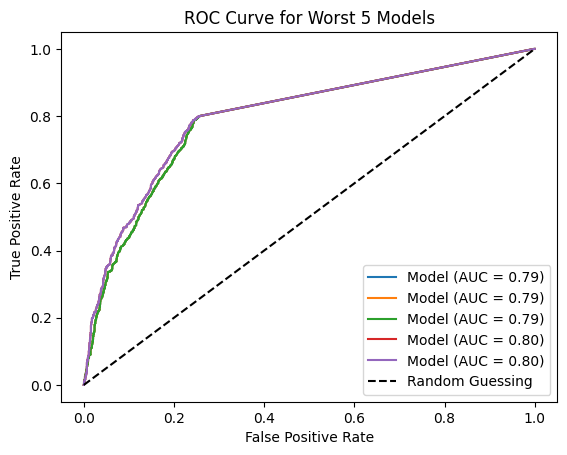

In [13]:

model_performance_sorted = sorted(model_performance, key=lambda x: x[0])
print("\nWorst Performing Models:")
for i, (auc_score, params) in enumerate(model_performance_sorted[:5]):
    print(f"Model {i+1}:")
    print(f"Parameters: {params}")
    print(f"AUC Score: {auc_score:.2f}")
    # Assuming roc_auc_list, accuracy_list, precision_list, recall_list, f1_list are defined elsewhere
    print(f"Accuracy: {accuracy_list[i]:.2f}")
    print(f"Precision: {precision_list[i]:.2f}")
    print(f"Recall: {recall_list[i]:.2f}")
    print(f"F1 Score: {f1_list[i]:.2f}")
    print()

# Plot ROC curves for the worst 5 models
plt.figure()
for auc_score, params in model_performance_sorted[:5]:
    clf = SGDClassifier(loss='log_loss', alpha=params['alpha'], penalty=params['penalty'],
                        learning_rate=params['learning_rate'], eta0=params['eta0'],
                        max_iter=params['max_iter'], random_state=42)
    doc_stream = stream_docs(path=r"C:\Users\ryan_\OneDrive\Desktop\Suicide Watch Detection\src\Data\cleaned_data.csv")
    X_train, y_train = get_minibatch(doc_stream, size=4641)
    X_train = vect.transform(X_train)
    clf.partial_fit(X_train, y_train, classes=classes)
    y_score = clf.predict_proba(X_train)[:, 1]
    fpr, tpr, _ = roc_curve(y_train, y_score)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'Model (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--', label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Worst 5 Models')
plt.legend()
plt.show()

In [9]:
best_params = {'alpha': 0.0001, 'penalty': 'l2', 'learning_rate': 'adaptive', 'eta0': 1.0, 'max_iter': 1000} # Defines the best parameters

pbar = pyprind.ProgBar(45) # progress bar
classes = np.array([0,1]) # establishes classes made of of [0,1]
doc_stream = stream_docs(path= r"C:\Users\ryan_\OneDrive\Desktop\Suicide Watch Detection\src\Data\cleaned_data.csv") #Streams in data a bit at a time
clf = SGDClassifier(loss='log_loss', **best_params)
scores_list = []
for _ in range(45): #iterates training through each batch of data
    X_train, y_train = get_minibatch(doc_stream, size = 4641)
    if not X_train:
        break
    X_train = vect.transform(X_train)
    clf.partial_fit(X_train, y_train, classes=classes)
    pbar.update()
    

0% [##############################] 100% | ETA: 00:00:00
Total time elapsed: 00:00:26


In [10]:
X_test, y_test = get_minibatch(doc_stream, size = 23207)
X_test = vect.transform(X_test)
print(f'Accuracy: {clf.score(X_test, y_test):.3f}')

Accuracy: 0.900
